In [10]:
from quchem.Hamiltonian_Generator_Functions import *
from quchem.Graph import *
### HAMILTONIAN start
Molecule = 'LiH'
geometry = None # [('H', (0., 0., 0.)), ('H', (0., 0., 0.74))]
basis = 'sto-6g'


### Get Hamiltonian
Hamilt = Hamiltonian_PySCF(Molecule,
                     run_scf=1, run_mp2=1, run_cisd=1, run_ccsd=1, run_fci=1,
                     basis=basis,
                     multiplicity=1,
                     geometry=geometry)  # normally None!
QubitHamiltonian = Hamilt.Get_Qubit_Hamiltonian(threshold=None, transformation='BK')
### HAMILTONIAN end
QubitHamiltonian

(-3.9899724181893568+0j) [] +
(0.04037460325643415+0j) [X0 X1 X2] +
(-0.003161587604204829+0j) [X0 X1 X2 X3 Y7 Y11] +
(0.001620476926376657+0j) [X0 X1 X2 Y3 Y5] +
(0.0036508502556746713+0j) [X0 X1 X2 Z3] +
(0.0018998726581455844+0j) [X0 X1 Z2 X3 Y7 Z9 Y10 X11] +
(0.004695260540245527+0j) [X0 X1 Z2 Y3 Y4 X5] +
(-0.0012113027134839863+0j) [X0 X1 X3 X4 Y7 Y11] +
(0.001044195770483103+0j) [X0 X1 X3 Y4 Y5 Z6 Z7] +
(0.0012113027134839863+0j) [X0 X1 X3 Y4 Z5 Y7 Z9 Z10 X11] +
(0.0025594391105534815+0j) [X0 X1 X3 Z4 Y5 Y6 Z7] +
(6.648581206835727e-05+0j) [X0 X1 X3 Z4 Z5 Y7 Z9 Y10 X11] +
(0.0012777885255523436+0j) [X0 X1 X3 Z4 Y7 Z9 Y10 X11] +
(0.0009618499558327805+0j) [X0 X1 X3 X6 Y7 Y11] +
(-0.0001567017221040446+0j) [X0 X1 X3 Z6 Y7 Z9 Y10 X11] +
(0.0009618499558327804+0j) [X0 X1 X3 Y7 X8 Y11] +
(-0.0009618499558327804+0j) [X0 X1 X3 Y7 Y8 Z10 X11] +
(-0.00015670172210404578+0j) [X0 X1 X3 Y7 Z8 Z9 Y10 X11] +
(0.0008051482337287346+0j) [X0 X1 X3 Y7 Z8 Y10 X11] +
(0.015294910119290529+0j) [X0 X1

The LiH ground state under JW is:

$$|\psi \rangle_{HF}^{ground} = | 1 1 1 1 \:  0 0 0 0 0 0 0 0 \rangle$$

and under BK is:

$$|\psi \rangle_{HF}^{ground} = | 1 0 1 0 0 0 0 0 0 0 0 0 \rangle$$

Use NOON to reduces this:

In [12]:
from quchem.Ansatz_Generator_Functions import *

##
NOON_spins_combined, NMO_basis = Hamilt.Get_NOON()
##
Hamilt.Get_CCSD_Amplitudes()

NOON_spins_combined

array([1.99991562e+00, 1.96764864e+00, 2.71791037e-02, 7.62575442e-05,
       2.59018655e-03, 2.59018655e-03])

LOOK at PHYS. REV. X, **8**, 031022 (2018)

Due to NOON:
- indices 0,1 assumed to ALWAYS be filled
- indices 8,9 and 10,11 ALWAYS unfilled! <--- decision



# Therefore Simplify Hamiltonian

In [13]:
ansatz_obj = BK_Qubit_Reduction(QubitHamiltonian,
                             Hamilt.molecule.n_electrons,
                             Hamilt.molecule.n_qubits)

The LiH ground state under JW is:

$$|\psi \rangle_{HF}^{ground} = | 1 1 1 1 \:  0 0 0 0 0 0 0 0 \rangle$$

and under BK is:

$$|\psi \rangle_{HF}^{ground} = | 1 0 1 0 0 0 0 0 0 0 0 0 \rangle$$


we have **fixed occupations** of indices [0,1,8,9,10,11]

- therefore can remove these terms from the Hamiltonian!

In [14]:
list_of_qubit_indices_to_remove = [0,1,8,9,10,11]
reduced_Qubit_Hamiltonian = ansatz_obj.Remove_indices_from_Hamiltonian(list_of_qubit_indices_to_remove)
print('Hamiltonian size reduced: {} --> {}'.format(len(list(QubitHamiltonian)), len(list(reduced_Qubit_Hamiltonian))))

Hamiltonian size reduced: 631 --> 239


In [15]:
qubit_re_label_dict, reduced_RE_LABELLED_Qubit_Hamiltonian = ansatz_obj.Re_label_Hamiltonian(reduced_Qubit_Hamiltonian)
reduced_RE_LABELLED_Qubit_Hamiltonian

(-7.264831837971682+0j) [] +
(0.1094535258799573+0j) [X0] +
(0.009344683608057045+0j) [X0 X1 X2 X3] +
(-0.0010620487016481535+0j) [X0 X1 X2 Y5] +
(0.001620476926376657+0j) [X0 X1 Y2 X3] +
(-0.00027634696897324383+0j) [X0 X1 Y2 Y3 Z4 Z5] +
(0.0010620487016481535+0j) [X0 X1 Y2 Z3 Y5] +
(-0.001620476926376657+0j) [X0 X1 Z2 X3] +
(0.004836443728007198+0j) [X0 X1 Z2 Y3 Y4 Z5] +
(-0.0036483490336069015+0j) [X0 X1 Z2 Z3 Y5] +
(-0.0025863003319587484+0j) [X0 X1 Z2 Y5] +
(0.004075918085156635+0j) [X0 X1 X4 Y5] +
(-0.00975056933535559+0j) [X0 X1 Z4 Y5] +
(-0.02338015757258015+0j) [X0 X1 Y5] +
(-0.001620476926376657+0j) [X0 Y1 X2 X3] +
(0.00032184554261978837+0j) [X0 Y1 X2 Y3] +
(0.004739070747223366+0j) [X0 Y1 Y2 X3] +
(0.004560096759033955+0j) [X0 Y1 Y2 X3 Z4] +
(-0.005863061579434253+0j) [X0 Y1 Z2 X3] +
(0.00024156424816917411+0j) [X0 Y1 Y3] +
(-0.004836443728007198+0j) [X0 Y1 Y3 X4] +
(-0.004075918085156635+0j) [X0 Y1 Z3 Y4 X5] +
(-0.005674651250198956+0j) [X0 Y1 Z3 Z4 X5] +
(0.04054894009851

In [16]:
new_Molecular_H_MATRIX = Hamilt.Get_sparse_Qubit_Hamiltonian_matrix(reduced_RE_LABELLED_Qubit_Hamiltonian)


from scipy.sparse.linalg import eigs
eig_values, eig_vectors = eigs(new_Molecular_H_MATRIX)
new_FCI_Energy = min(eig_values)


print('new_FCI = ', new_FCI_Energy, 'VS old FCI:', Hamilt.molecule.fci_energy)

new_FCI =  (-7.940677175840118+4.9327327021799267e-17j) VS old FCI: -7.875652564927912


## Looking at Ansatz

In [17]:
# automate:
# reduced_Sec_Quant_CC_ops_ia, reduced_Sec_Quant_CC_ops_ijab, reduced_theta_parameters_ia, reduced_theta_parameters_ijab =ansatz_obj.Remove_NOON_terms(
#     NOON=NOON_spins_combined,
#     occ_threshold= 1.999,
#     unocc_threshold=1e-4,
#     indices_to_remove_list_manual=None, 
#     single_cc_amplitudes=Hamilt.molecule.single_cc_amplitudes,
#     double_cc_amplitudes=Hamilt.molecule.double_cc_amplitudes,
#     singles_hamiltonian=Hamilt.singles_hamiltonian,
#     doubles_hamiltonian=Hamilt.doubles_hamiltonian,
#     tol_filter_small_terms=None)

# manual
reduced_Sec_Quant_CC_ops_ia, reduced_Sec_Quant_CC_ops_ijab, reduced_theta_parameters_ia, reduced_theta_parameters_ijab =ansatz_obj.Remove_NOON_terms(
    NOON=NOON_spins_combined,
    indices_to_remove_list_manual=[0,1,8,9,10,11])

In [18]:
reduced_Sec_Quant_CC_ops_ijab

[-1.0 [2^ 3^ 4 5] +
 1.0 [5^ 4^ 3 2],
 -1.0 [2^ 3^ 4 7] +
 1.0 [7^ 4^ 3 2],
 -1.0 [2^ 3^ 6 7] +
 1.0 [7^ 6^ 3 2]]

In [19]:
ia_terms, ijab_terms, ia_theta, ijab_theta = ansatz_obj.Get_ia_and_ijab_terms()
print('REDUCTION')
print('ia_terms', len(ia_terms), 'TO', len(reduced_Sec_Quant_CC_ops_ia))
print('ijab_terms', len(ijab_terms), 'TO', len(reduced_Sec_Quant_CC_ops_ijab))

REDUCTION
ia_terms 16 TO 4
ijab_terms 42 TO 3


In [20]:
Qubit_Op_list_Second_Quant_CC_Ops_ia, Qubit_Op_list_Second_Quant_CC_Ops_ijab = ansatz_obj.UCCSD_single_trotter_step(reduced_Sec_Quant_CC_ops_ia,
                                                                                                                    reduced_Sec_Quant_CC_ops_ijab,
                                                                                                                     transformation='BK')

# # NO reduction!
# Qubit_Op_list_Second_Quant_CC_Ops_ia, Qubit_Op_list_Second_Quant_CC_Ops_ijab = ansatz_obj.UCCSD_single_trotter_step(ia_terms,
#                                                                                                                     ijab_terms
#                                                                                                                     transformation='BK')


In [21]:
print(Qubit_Op_list_Second_Quant_CC_Ops_ijab)
print('')

print('only considering')
print(list(Qubit_Op_list_Second_Quant_CC_Ops_ijab[0])[0])
print(list(Qubit_Op_list_Second_Quant_CC_Ops_ijab[2])[0])

[0.125j [Z1 X2 Z3 Y4] +
0.125j [Z1 X2 Z3 Y4 Z5] +
-0.125j [Z1 Y2 Z3 X4] +
-0.125j [Z1 Y2 Z3 X4 Z5] +
0.125j [X2 Y4] +
0.125j [X2 Y4 Z5] +
-0.125j [Y2 X4] +
-0.125j [Y2 X4 Z5], 0.125j [Z1 X2 Z3 X4 Y5 Z6] +
0.125j [Z1 X2 Y4 X5 Z7] +
0.125j [Z1 Y2 Z3 Y4 Y5 Z6] +
-0.125j [Z1 Y2 X4 X5 Z7] +
0.125j [X2 Z3 Y4 X5 Z7] +
0.125j [X2 X4 Y5 Z6] +
-0.125j [Y2 Z3 X4 X5 Z7] +
0.125j [Y2 Y4 Y5 Z6], 0.125j [Z1 X2 Z3 Y6] +
0.125j [Z1 X2 Z5 Y6 Z7] +
-0.125j [Z1 Y2 Z3 X6] +
-0.125j [Z1 Y2 Z5 X6 Z7] +
0.125j [X2 Z3 Z5 Y6 Z7] +
0.125j [X2 Y6] +
-0.125j [Y2 Z3 Z5 X6 Z7] +
-0.125j [Y2 X6]]

only considering
0.125j [X2 Y4]
0.125j [X2 Y6]


In [22]:
from openfermion.ops import QubitOperator

op_1 = QubitOperator(list(list(Qubit_Op_list_Second_Quant_CC_Ops_ijab[0])[0].terms.items())[0][0], -1j)
op_2 = QubitOperator(list(list(Qubit_Op_list_Second_Quant_CC_Ops_ijab[2])[0].terms.items())[0][0], -1j)

Qubit_Op_list_Second_Quant_CC_Ops_ijab_SELECTION = [op_1, op_2]
print(Qubit_Op_list_Second_Quant_CC_Ops_ijab_SELECTION)

theta_ijab_selected = [0 for _ in range(len(Qubit_Op_list_Second_Quant_CC_Ops_ijab_SELECTION))] 
theta_ijab_selected

[(-0-1j) [X2 Y4], (-0-1j) [X2 Y6]]


[0, 0]

In [23]:
reduced_CC_ijab = ansatz_obj.Remove_indices_from_CC_qubit_operators(Qubit_Op_list_Second_Quant_CC_Ops_ijab_SELECTION, list_of_qubit_indices_to_remove)
reduced_CC_ijab

[-1j [X2 Y4], -1j [X2 Y6]]

In [24]:
reduced_RE_LABELLED_CC_ijab = ansatz_obj.Re_label_CC_qubit_operators( qubit_re_label_dict, 
                                                                   reduced_CC_ijab)
reduced_RE_LABELLED_CC_ijab

[-1j [X0 Y2], -1j [X0 Y4]]

## HF input state

In [25]:
print('old input = ', ansatz_obj.Get_BK_HF_state_in_OCC_basis())

print('BUT following indices removed:', list_of_qubit_indices_to_remove)

ansatz_obj.New_BK_HF_state(list_of_qubit_indices_to_remove)

old input =  [1. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
BUT following indices removed: [0, 1, 8, 9, 10, 11]


array([1., 0., 0., 0., 0., 0.])

# Ansatz

look at: From PHYS. REV. X, **8**, 031022 (2018)

can make a further reduction!

In [26]:
reduced_RE_LABELLED_CC_ijab

[-1j [X0 Y2], -1j [X0 Y4]]

In [27]:
import random
# theta_ia_random_input = [random.uniform(0, 2*np.pi) for _ in range(len(reduced_RE_LABELLED_CC_ia))]
theta_ijab_random_input = [random.uniform(0, 2*np.pi) for _ in range(len(reduced_RE_LABELLED_CC_ijab))]

In [28]:
input_state = ansatz_obj.New_BK_HF_state(list_of_qubit_indices_to_remove)
print('input_state =', input_state)

UCCSD_ansatz_Q_Circ_obj = Ansatz_Circuit(input_state,
                                     None,                                     # <-- note no ia terms!
                                     reduced_RE_LABELLED_CC_ijab)

ansatz_cirq_circuit =UCCSD_ansatz_Q_Circ_obj.Get_Full_HF_UCCSD_QC(
                                         Theta_param_list_ijab=theta_ijab_random_input,
                                         ia_first=True)
ansatz_cirq_circuit

input_state = [1. 0. 0. 0. 0. 0.]


0: ───X───H──────────@────────────────@───H───────────H───@──────────────────────────────@───H───────────
                     │                │                   │                              │
1: ───I──────────────┼────────────────┼───────────────────┼──────────────────────────────┼───────────────
                     │                │                   │                              │
2: ───I───Rx(0.5π)───X───Rz(0.357π)───X───Rx(-0.5π)───────┼──────────────────────────────┼───────────────
                                                          │                              │
3: ───I───────────────────────────────────────────────────┼──────────────────────────────┼───────────────
                                                          │                              │
4: ───I───Rx(0.5π)────────────────────────────────────────X───Rz(-1.7040000000000002π)───X───Rx(-0.5π)───

5: ───I──────────────────────────────────────────────────────────────────────────────────────────────────

# Running Example

In [29]:
Hamiltonian_graph_obj = Openfermion_Hamiltonian_Graph(reduced_RE_LABELLED_Qubit_Hamiltonian)

commutativity_flag = 'AC' ## <- defines relationship between sets!!!
plot_graph = False
Graph_colouring_strategy='largest_first'
anti_commuting_sets = Hamiltonian_graph_obj.Get_Clique_Cover_as_QubitOp(commutativity_flag, Graph_colouring_strategy=Graph_colouring_strategy, plot_graph=plot_graph)
anti_commuting_sets

Building Graph Edges: 100%|##########| 239/239 [00:02<00:00, 99.83it/s] 


{0: [(0.07828114149315563+0j) [Z1 Z3 Z5]],
 1: [(-7.264831837971682+0j) []],
 2: [(-0.1443201912269894+0j) [Z1 Z3 Z4 Z5],
  (0.005610346244611418+0j) [Y4],
  (0.010671449192243564+0j) [Z1 Z3 X4 Z5]],
 3: [(-0.14432019122698936+0j) [Z4],
  (0.005610346244611418+0j) [Z1 Z3 Y4 Z5],
  (0.010671449192243564+0j) [X4]],
 4: [(0.017548783925033062+0j) [Z0],
  (0.1094535258799573+0j) [X0],
  (0.004931982511593991+0j) [Y0]],
 5: [(-0.1343171987757234+0j) [Z2 Z3],
  (0.004739070747223361+0j) [X1 Z2 X3],
  (0.011871946723162045+0j) [Y2],
  (0.02227398055995153+0j) [X2],
  (0.0025594391105534815+0j) [X1 Z2 Y3 X4 Z5],
  (0.03287120818002586+0j) [Z1 Z2 X3 Y5],
  (0.0025594391105534815+0j) [X1 Z2 Y3 Y4 Z5],
  (-0.0036036348810365845+0j) [X1 Z2 Y3 Z4 Z5]],
 6: [(-0.13431719877572343+0j) [Z2],
  (0.011871946723162045+0j) [Y2 Z3],
  (0.005863061579434253+0j) [X1 Y2 X3],
  (0.004739070747223366+0j) [X0 Y1 Y2 X3],
  (-0.002688933646883322+0j) [Z1 Y2 X3 Y5],
  (0.004836443728007198+0j) [Z0 X1 Y2 Y3 X4 Z5],


In [30]:
from quchem.LCU_method import *

In [31]:
N_QUBITS = Hamilt.molecule.n_qubits - len(list_of_qubit_indices_to_remove)
n_shots= 100

def GIVE_ENERGY_LCU(theta_ijab):
    
    ansatz_cirq_circuit =UCCSD_ansatz_Q_Circ_obj.Get_Full_HF_UCCSD_QC(
                                        Theta_param_list_ia=None, 
                                         Theta_param_list_ijab=theta_ijab,
                                         ia_first=True)

    VQE_exp_LCU =  VQE_Experiment_LCU_UP(anti_commuting_sets,
                     ansatz_cirq_circuit,
                     n_shots,
                     N_QUBITS,
                     N_indices_dict=None)#{7:0, 8:1, 9:0, 10:1})
    
    return VQE_exp_LCU.Calc_Energy().real


In [32]:
import random
theta_ijab_random_input = [random.uniform(0, 2*np.pi) for _ in range(len(reduced_RE_LABELLED_CC_ijab))]

print(theta_ijab_random_input)

GIVE_ENERGY_LCU(theta_ijab_random_input)

[2.3442997191686743, 2.3826185364663335]


-6.889732991388428

## Simulating

In [33]:
def calc_gradient_ADAM(theta_ia_theta_jab_list):
    
    grad_list=[]
    
    for index, theta in enumerate(theta_ia_theta_jab_list):
        
        new_theta_list = theta_ia_theta_jab_list.copy()
        new_theta_list[index] = theta + np.pi/4
        
        Obs_PLUS = GIVE_ENERGY_LCU(new_theta_list)
               
        
        new_theta_list[index] = theta - np.pi/4
        Obs_MINUS = GIVE_ENERGY_LCU(new_theta_list)
        
        gradient = Obs_PLUS - Obs_MINUS
        
        grad_list.append(gradient)
        

    return np.array(grad_list)

In [34]:
### optimizer
from quchem.Scipy_Optimizer import _minimize_Adam, Optimizer

0: Input_to_Funct: [2.44429972 2.48261854]: Output: -7.0729604291659856
1: Input_to_Funct: [2.54441767 2.58204283]: Output: -7.237595445951641
2: Input_to_Funct: [2.64315601 2.67908416]: Output: -7.357713017090202
3: Input_to_Funct: [2.74132322 2.7731923 ]: Output: -7.550813688257085
4: Input_to_Funct: [2.83739287 2.86541332]: Output: -7.649905902351163
5: Input_to_Funct: [2.93018274 2.95240469]: Output: -7.753911513313628
6: Input_to_Funct: [3.01802295 3.03450161]: Output: -7.889635356609573
7: Input_to_Funct: [3.09823022 3.10856318]: Output: -7.924485061195017
8: Input_to_Funct: [3.16989665 3.17608793]: Output: -7.915680822735516
9: Input_to_Funct: [3.23252177 3.23521207]: Output: -7.881696784584316
10: Input_to_Funct: [3.28489112 3.28493094]: Output: -7.7994552698486
11: Input_to_Funct: [3.3253526  3.32320125]: Output: -7.762377635950595
12: Input_to_Funct: [3.35488062 3.35080871]: Output: -7.725578616770137
13: Input_to_Funct: [3.37451188 3.36695   ]: Output: -7.71667750696379
14: 

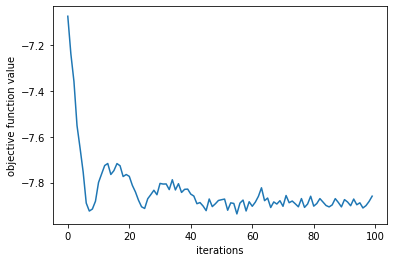

In [35]:
custom_optimizer_DICT = {'learning_rate': 0.1, 'beta_1': 0.9, 'beta_2': 0.999, 'epsilon': 1e-8,
                           'delta': 1e-8, 'maxfev': 15000}
tol = 1e-6

GG = Optimizer(GIVE_ENERGY_LCU,
                   theta_ijab_random_input,
                   args=(),
                   method=_minimize_Adam,
                   jac=calc_gradient_ADAM,
                   hess=None,
                   hessp=None,
                      bounds=None,
                   constraints=None,
                   tol=tol, 
                   display_convergence_message=True,
                   display_steps=True, 
                   custom_optimizer_DICT=custom_optimizer_DICT)
GG.get_env(100)
GG.plot_convergence()
plt.show()

In [ ]:
# Nelder-Mead

GG = Optimizer(GIVE_ENERGY_LCU,
                   theta_ijab_random_input,
                   args=(),
                   method='Nelder-Mead',
                   jac=None,
                   hess=None,
                   hessp=None,
                      bounds=None,
                   constraints=None,
                   display_convergence_message=True,
                   display_steps=True)

GG.get_env(50)
GG.plot_convergence()
plt.show()

In [ ]:
# # finite difference

# custom_optimizer_DICT = {'learning_rate': 0.1, 'beta_1': 0.9, 'beta_2': 0.999, 'epsilon': 1e-8,
#                            'delta': 1e-8, 'maxfev': 15000}

# GG = Optimizer(GIVE_ENERGY_LCU,
#                    theta_combined_random_input,
#                    args=(),
#                    method=_minimize_Adam,
#                    jac=None,                 # <-- finite difference approach!
#                    hess=None,
#                    hessp=None,
#                       bounds=None,
#                    constraints=None,
#                    tol=1e-20, 
#                    display_convergence_message=True,
#                    display_steps=True, 
#                    custom_optimizer_DICT=custom_optimizer_DICT)
# GG.get_env(100)
# GG.plot_convergence()
# plt.show()

In [ ]:
Hamilt.molecule.fci_energy